<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionalesI2025/blob/main/Semana14/AjusteNolineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import scipy.optimize as spo
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
os.chdir("/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI2025/Semana14/Data/")
!ls

Exponencial.dat


In [5]:
data = pd.read_csv('Exponencial.dat',sep=' ')
data.columns = ['x','y']
x = np.array(data['x'])
y = np.array(data['y'])

sigma = np.random.normal(0,6,len(x))
sigma = np.abs(sigma)
sigma

array([ 5.092547  ,  1.48452224,  6.47795383,  4.62168819,  5.44186997,
        4.31598249,  2.84982233,  2.85876813,  3.44194899,  6.33825563,
        4.52100763,  3.71607584,  1.01048557,  4.49128992,  5.58762511,
        3.08813078,  4.99941597,  7.0972146 ,  3.26002392,  5.90077569,
        2.08757918, 14.09145321,  2.84279001,  7.30241709,  1.33118698,
        8.39304843,  5.83678979,  5.45298533,  4.11816534])

Text(0, 0.5, 'y')

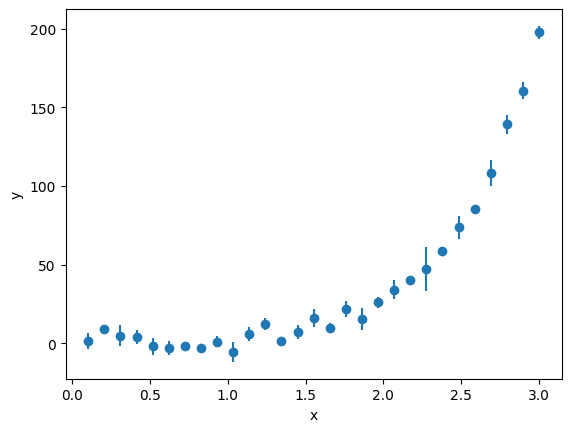

In [6]:
plt.errorbar(x,y,yerr=sigma,fmt='o')
plt.xlabel('x')
plt.ylabel('y')

In [13]:
# Definimos el modelo
def GetModel1(x,p):
  y = p[0]*np.exp(p[1]*x)
  return y

In [14]:
def Chi2(p,x,y,sigma,Model):

  return np.sum( (y - Model(x,p))**2/(sigma**2)   )

In [16]:
nll = lambda *p: Chi2(*p)

In [21]:
p0 =np.array([1.,2.])

In [23]:
result = spo.minimize( nll, p0, args=(x,y,sigma,GetModel1) )
result

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 82.6872046499138
        x: [ 4.097e-01  2.065e+00]
      nit: 18
      jac: [-9.537e-07 -9.537e-07]
 hess_inv: [[ 9.491e-04 -8.501e-04]
            [-8.501e-04  7.689e-04]]
     nfev: 90
     njev: 30

In [25]:
params = result.x
t = np.linspace(min(x),max(x),100)
params

array([0.40968129, 2.06539264])

Text(0, 0.5, 'y')

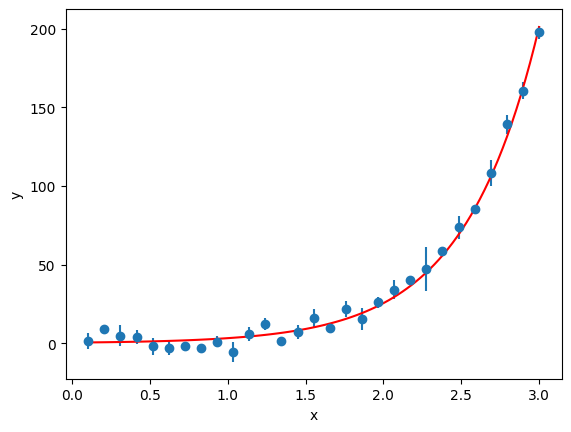

In [27]:
plt.errorbar(x,y,yerr=sigma,fmt='o')
plt.plot(t,GetModel1(t,params),color='r')
plt.xlabel('x')
plt.ylabel('y')